<a href="https://colab.research.google.com/github/jenaroaaugusto/IC2/blob/master/CNN_Nova_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Definição das bibliotecas 

In [ ]:
import tensorflow as tf 
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import os
import pathlib
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


from tensorflow.keras import datasets, layers, models,optimizers
from tensorflow.keras.layers import Activation, Dense

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

#Carragemento dos dados 

In [ ]:
!git clone https://github.com/jenaroaaugusto/HOMUS

fatal: destination path 'HOMUS' already exists and is not an empty directory.


In [ ]:
!ls HOMUS/conjunto/

train  val


In [ ]:
trainDir = os.path.join('HOMUS/conjunto', 'train')
# validationDir=os.path.join('/content/Dataset_musica_semvalidacao', 'Teste')
testDir= os.path.join('HOMUS/conjunto','val')

In [ ]:
trainDir

'HOMUS/conjunto/train'

In [ ]:
train_dir = pathlib.Path(""+trainDir)
print(train_dir)
total_train = len(list(train_dir.glob('*/*.png')))
print(total_train)
CLASS_NAMES=np.array(os.listdir(train_dir))
print(CLASS_NAMES)

HOMUS/conjunto/train
10636
['6-8-Time' 'Sixty-Four-Rest' 'G-Clef' '3-8-Time' 'Flat' 'Cut-Time'
 'Common-Time' '2-2-Time' 'Eighth-Rest' 'Sixteenth-Note' 'Half-Note'
 'Whole-Note' '3-4-Time' 'Barline' 'F-Clef' 'C-Clef' 'Quarter-Note'
 'Sixty-Four-Note' '12-8-Time' 'Dot' 'Eighth-Note' 'Natural'
 'Whole-Half-Rest' 'Thirty-Two-Note' '2-4-Time' 'Thirty-Two-Rest'
 'Sixteenth-Rest' 'Double-Sharp' 'Sharp' '4-4-Time' '9-8-Time'
 'Quarter-Rest']


In [ ]:
test_dir = pathlib.Path(""+testDir)
print(test_dir)
total_test = len(list(test_dir.glob('*/*.png')))
print(total_test)
CLASS_NAMEST=np.array(os.listdir(test_dir))
print(CLASS_NAMEST)

HOMUS/conjunto/val
4564
['6-8-Time' 'Sixty-Four-Rest' 'G-Clef' '3-8-Time' 'Flat' 'Cut-Time'
 'Common-Time' '2-2-Time' 'Eighth-Rest' 'Sixteenth-Note' 'Half-Note'
 'Whole-Note' '3-4-Time' 'Barline' 'F-Clef' 'C-Clef' 'Quarter-Note'
 'Sixty-Four-Note' '12-8-Time' 'Dot' 'Eighth-Note' 'Natural'
 'Whole-Half-Rest' 'Thirty-Two-Note' '2-4-Time' 'Thirty-Two-Rest'
 'Sixteenth-Rest' 'Double-Sharp' 'Sharp' '4-4-Time' '9-8-Time'
 'Quarter-Rest']


In [ ]:
# diretorio=os.listdir(test_dir)
# caminhos=list(test_dir.glob('*/*.bmp'))

#Definição de execução

In [ ]:
batch_size = 32
epochs = 200
IMG_HEIGHT = 28
IMG_WIDTH = 28


#Pre-Procesamento 
Geração do Generator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    rotation_range=45,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    validation_split = .2)
val_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split = .3)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_dir,
                                        target_size=(IMG_HEIGHT, IMG_WIDTH),
                                        batch_size=32,
                                        color_mode="grayscale",
                                        class_mode='categorical',
                                        shuffle = True,
                                        subset='training')

validation_set = val_datagen.flow_from_directory(train_dir,
                                        target_size=(IMG_HEIGHT, IMG_WIDTH),
                                        batch_size=32,
                                        color_mode="grayscale",
                                        class_mode='categorical',
                                        shuffle = False,
                                        subset='validation')

test_set = test_datagen.flow_from_directory(test_dir,
                                        target_size=(IMG_HEIGHT, IMG_WIDTH),
                                        batch_size=32,
                                        color_mode="grayscale",
                                        class_mode='categorical',
                                        shuffle = False,)

Found 8513 images belonging to 32 classes.
Found 3187 images belonging to 32 classes.
Found 4564 images belonging to 32 classes.


In [ ]:
len(training_set)

267

#Rede Neural Convolucional





#CNN

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (2, 2),padding="same",dilation_rate=(1, 1),activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (2, 2),padding="same",dilation_rate=(1, 1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (2, 2),padding="same",dilation_rate=(1, 1), activation='relu',))
model.add(layers.MaxPooling2D(2,2))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 128)       32896     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 256)         131328    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 256)        

#Camada Densa

In [ ]:
model.add(layers.Flatten())
# model.add(layers.Dropout(0.1))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(Dense(32,activation='softmax'))
# model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 128)       32896     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 256)         131328    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 256)        

#Definição de Metricas

In [ ]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]


#Definição de complicalção

*   Função de Otimização 
*   Função de perda 
*   Metricas de avaliação



In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=METRICS)

#Visualização do modelo

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 128)       32896     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 256)         131328    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 256)        

#Treinamento

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
history = model.fit(training_set,
                    steps_per_epoch=training_set.samples// batch_size,
                    epochs=epochs,
                    validation_data=validation_set,
                    validation_steps = validation_set.samples// batch_size,
                    callbacks=[early_stop])

Epoch 1/200
266/266 [==============================] - 34s 126ms/step - loss: 3.3761 - tp: 8.0000 - fp: 16.0000 - tn: 262895.0000 - fn: 8473.0000 - accuracy: 0.9687 - precision: 0.3333 - recall: 9.4329e-04 - auc: 0.5998 - val_loss: 3.2860 - val_tp: 20.0000 - val_fp: 61.0000 - val_tn: 98147.0000 - val_fn: 3148.0000 - val_accuracy: 0.9683 - val_precision: 0.2469 - val_recall: 0.0063 - val_auc: 0.6852
Epoch 2/200
266/266 [==============================] - 33s 123ms/step - loss: 2.8393 - tp: 274.0000 - fp: 105.0000 - tn: 262806.0000 - fn: 8207.0000 - accuracy: 0.9694 - precision: 0.7230 - recall: 0.0323 - auc: 0.7942 - val_loss: 2.9575 - val_tp: 156.0000 - val_fp: 249.0000 - val_tn: 97959.0000 - val_fn: 3012.0000 - val_accuracy: 0.9678 - val_precision: 0.3852 - val_recall: 0.0492 - val_auc: 0.8012
Epoch 3/200
266/266 [==============================] - 33s 123ms/step - loss: 2.4533 - tp: 620.0000 - fp: 243.0000 - tn: 262668.0000 - fn: 7861.0000 - accuracy: 0.9701 - precision: 0.7184 - recal

In [ ]:
# history = model.fit(training_set,
#                     steps_per_epoch=training_set.samples// batch_size,
#                     epochs=epochs,
#                     validation_data=validation_set,
#                     validation_steps = validation_set.samples// batch_size)

#Visualizar Resultados

ValueError: ignored

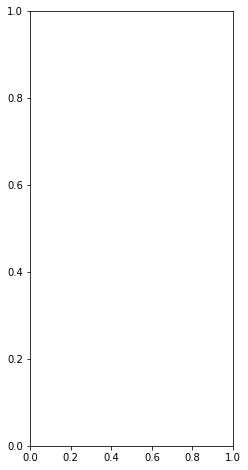

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("traning")
plt.savefig("traning.pdf")
plt.show()

ValueError: ignored

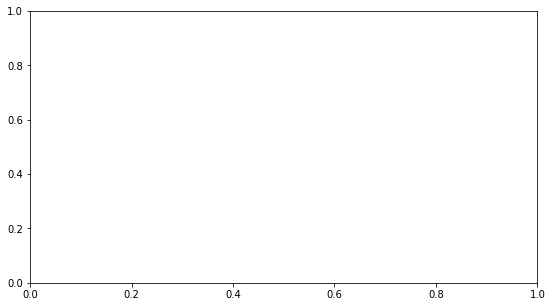

In [ ]:
prec = history.history['precision']
val_prec = history.history['val_precision']
rec= history.history['recall']
val_rec= history.history['val_recall']

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, linestyle="--",label='Validation Accuracy')
# plt.plot(epochs_range, prec, label='Training Precision')
# plt.plot(epochs_range, rec, label='Training Recall')
plt.legend(loc='lower right')

plt.title('Training Accuracy')
plt.savefig('acc.png')
plt.savefig('acc.pdf')

ValueError: ignored

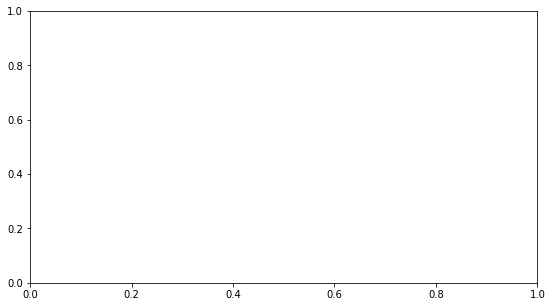

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, prec, label='Training Precision ')
plt.plot(epochs_range, val_prec, linestyle="--",label=' Validation Precision')
plt.legend(loc='lower right')

plt.title('Training precision')
plt.savefig('prec.png')
plt.savefig('prec2.pdf')

ValueError: ignored

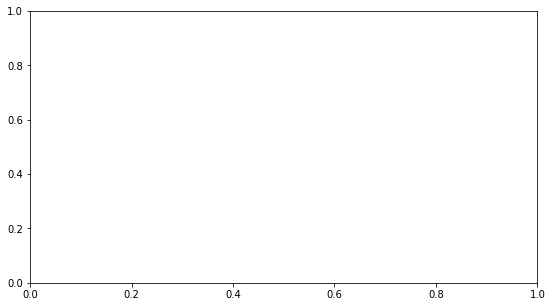

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rec, label='Training Recall ')
plt.plot(epochs_range, val_rec, linestyle="--",label=' Validation Recall')

plt.legend(loc='lower right')

plt.title('Training Recall')
plt.savefig('rec.png')
plt.savefig('rec2.pdf')

In [ ]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch,  history.history['loss'],
               color=colors[n], label='Train '+label)
  plt.semilogy(history.epoch,  history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

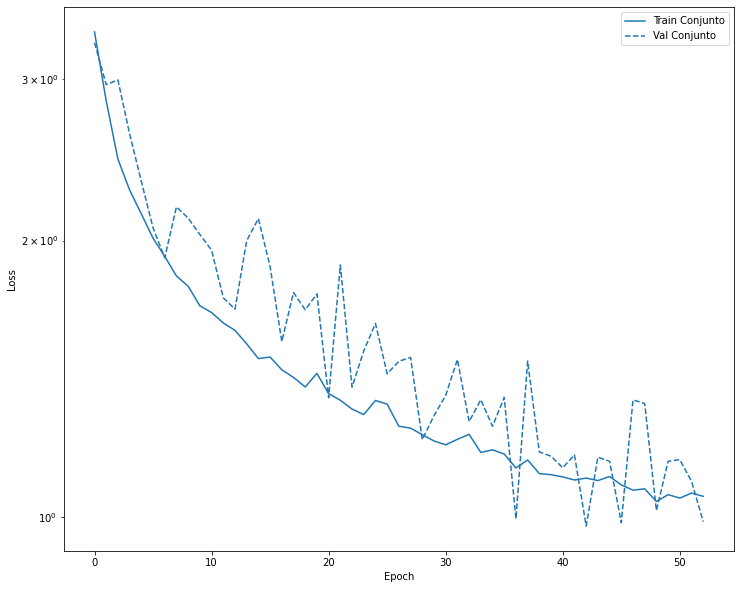

In [ ]:
plot_loss(history, "Conjunto", 0)


In [ ]:
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    
    plt.legend()
    # plt.figure(figsize=(5, 5))
    plt.savefig("metricasG.png")


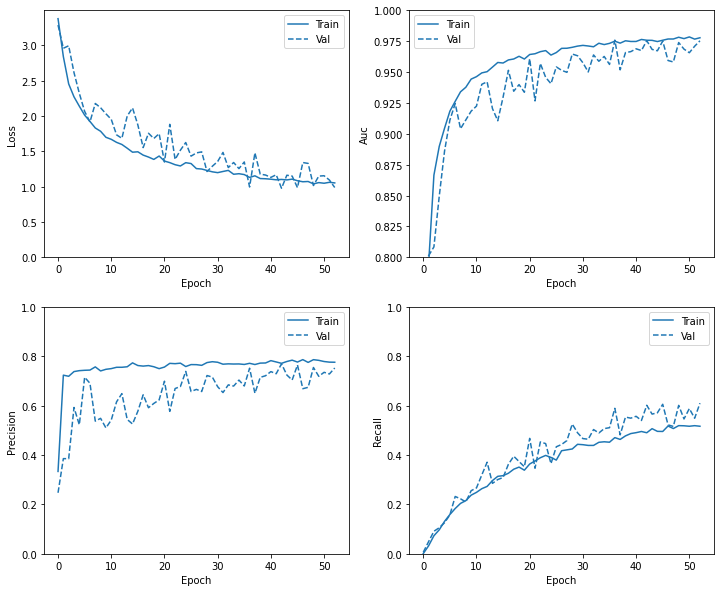

In [ ]:
plot_metrics(history)

#Predict

In [ ]:
nb=len(training_set.filenames)
ny=len(test_set.filenames)

In [ ]:
 axy=test_set.class_indices
 names=list(axy.keys())
 nomedasclasses = np.array(names)

In [ ]:
xc=model.predict(training_set,steps=np.ceil(nb/batch_size))

In [ ]:
train_predictions_baseline = model.predict(training_set,steps=np.ceil(nb/batch_size))

test_predictions_baseline = model.predict(test_set)

In [ ]:
true_labelsTrain=training_set.classes

true_labels =test_set.classes

In [ ]:
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in test_predictions_baseline])

x_true = true_labelsTrain
x_pred = np.array([np.argmax(x) for x in train_predictions_baseline])

In [ ]:
tf.math.confusion_matrix(y_true,y_pred)

<tf.Tensor: shape=(32, 32), dtype=int32, numpy=
array([[100,   0,   0, ...,   0,   0,   0],
       [  8,  77,   0, ...,   0,   0,   0],
       [  7,  18,  15, ...,   1,   0,   0],
       ...,
       [  1,   0,   0, ...,  56,   0,   0],
       [  0,   0,   0, ...,   0, 112,   0],
       [  0,   0,   0, ...,   0,   3, 110]], dtype=int32)>

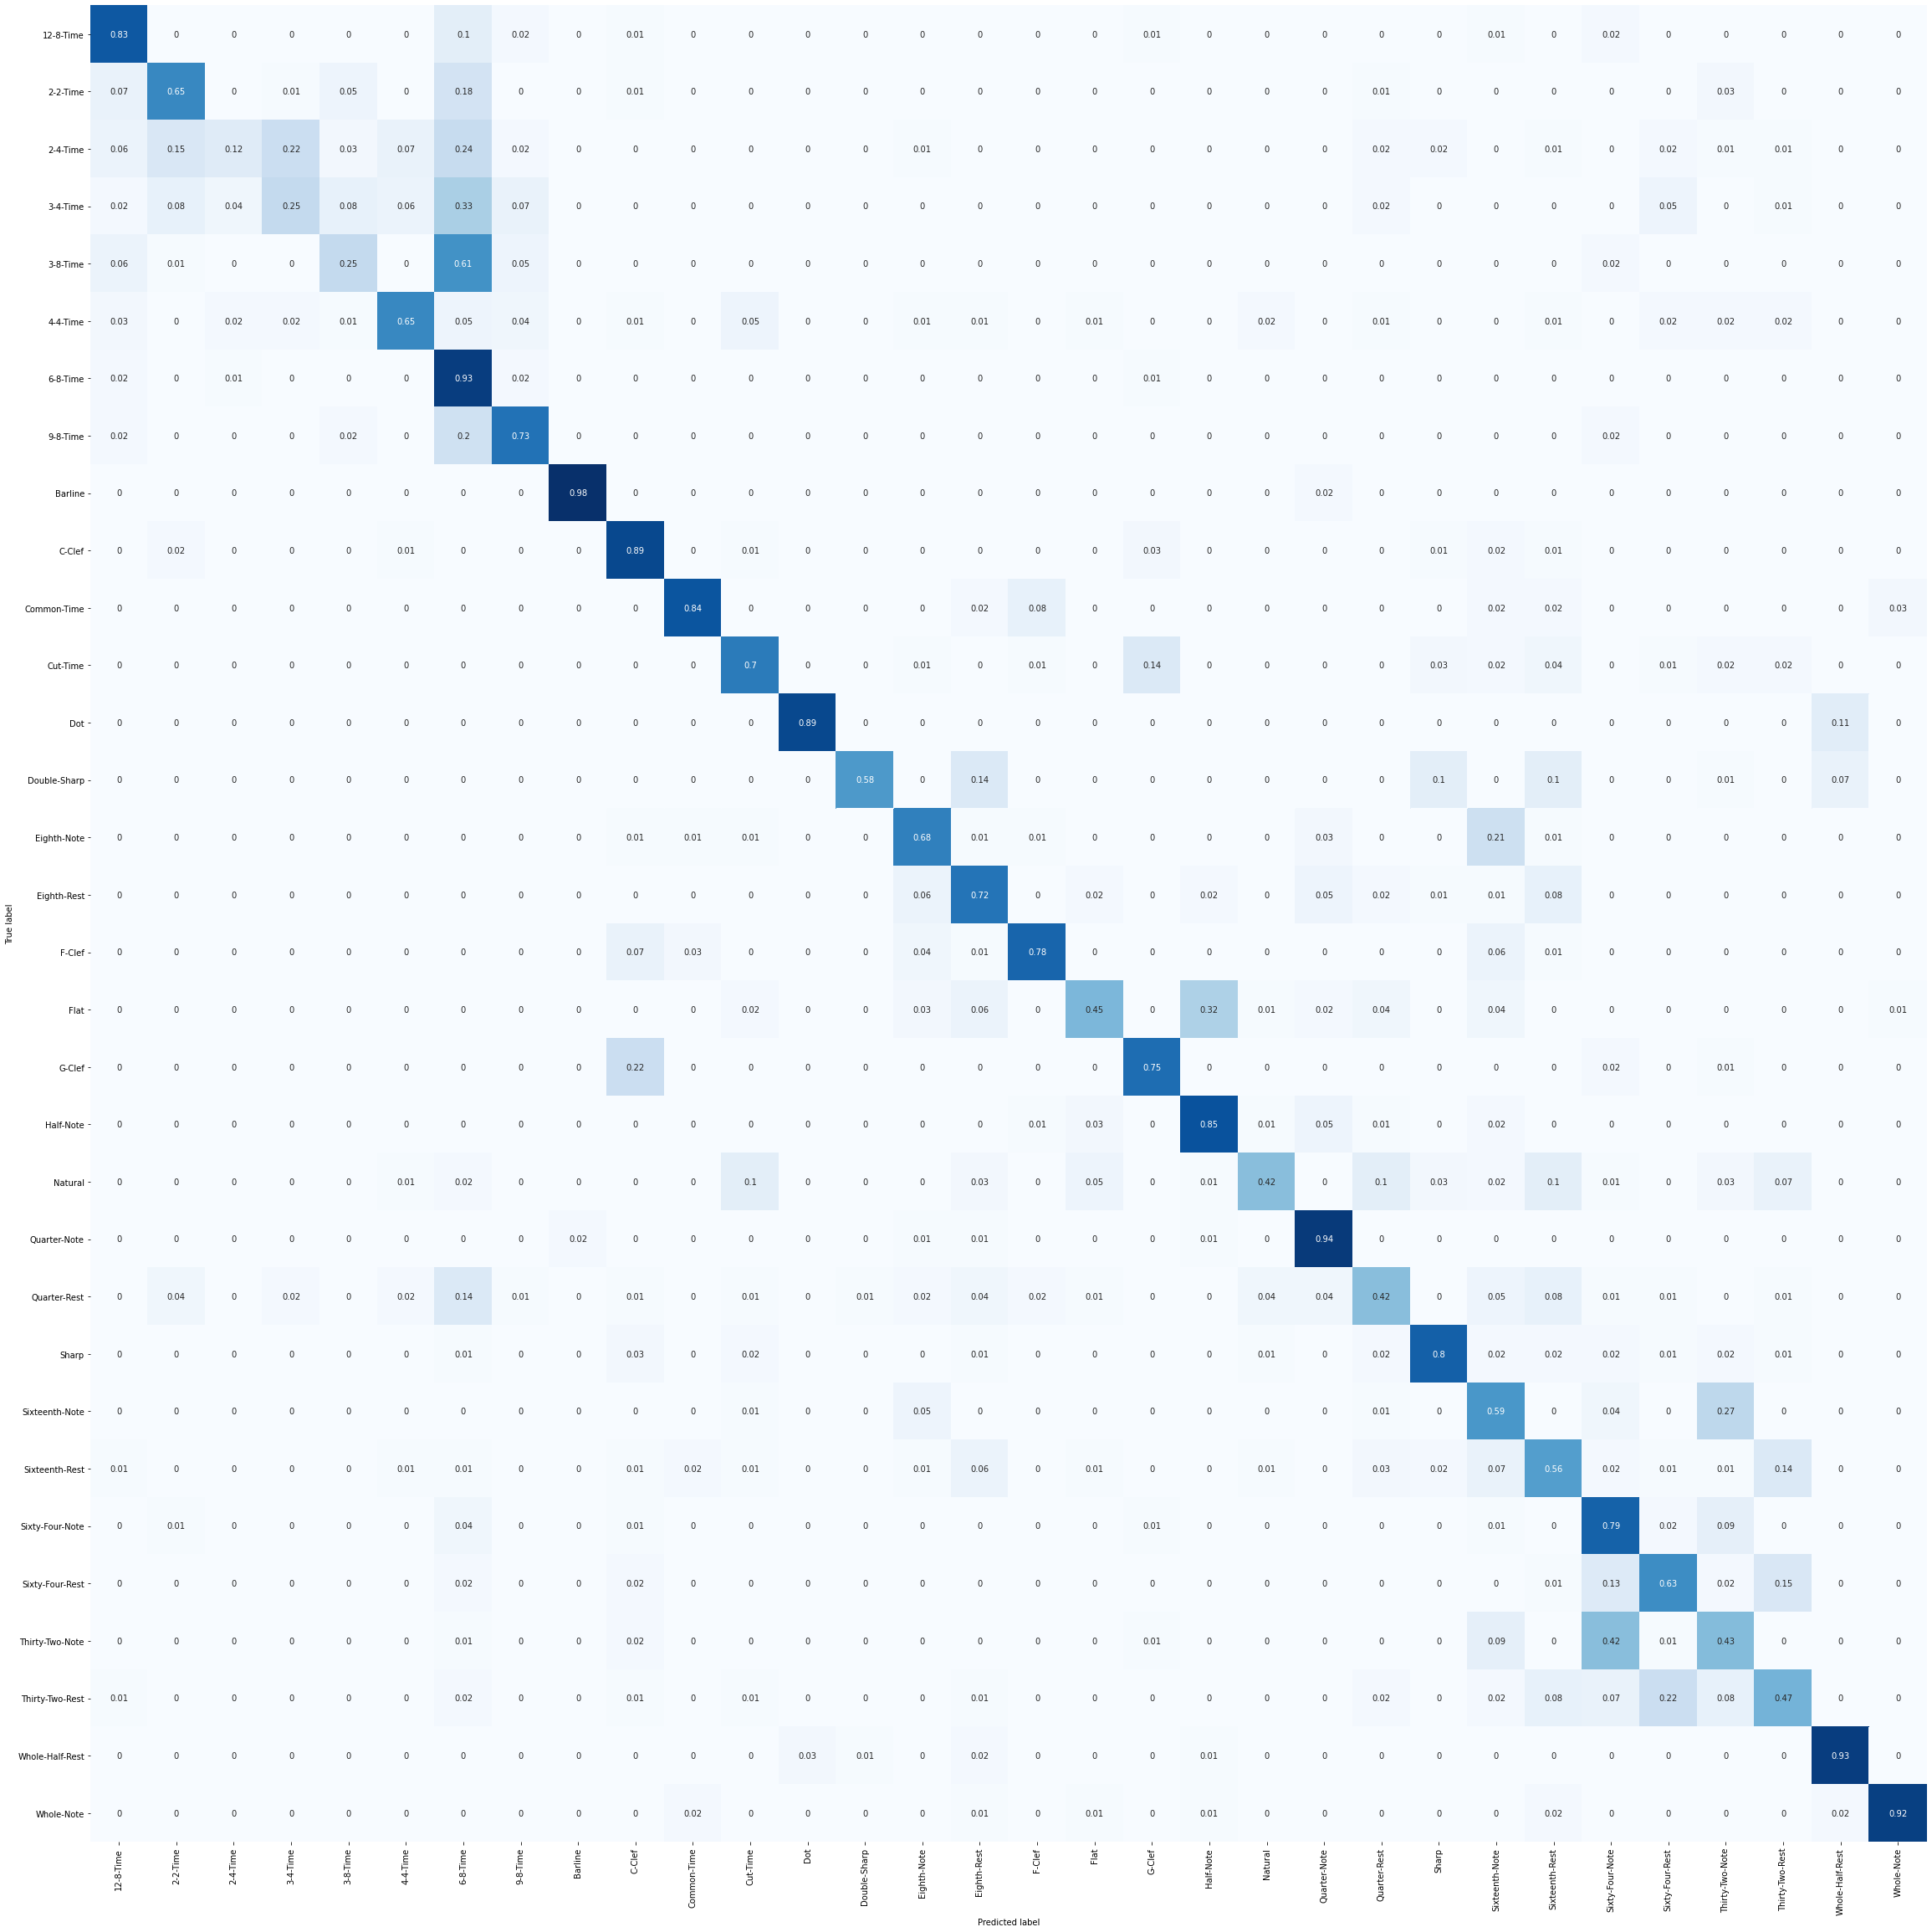

In [ ]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = nomedasclasses, 
                     columns = nomedasclasses)

figure = plt.figure(figsize=(32, 32))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues,cbar=False)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig("Matriz de Confusão norm")
plt.savefig("Matriz de Confusão norm.pdf")
plt.show()

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       120
           1       0.65      0.65      0.65       119
           2       0.62      0.12      0.21       120
           3       0.48      0.25      0.33       120
           4       0.56      0.25      0.34       120
           5       0.80      0.65      0.72       120
           6       0.31      0.93      0.47       120
           7       0.76      0.73      0.75       120
           8       0.97      0.98      0.97       121
           9       0.65      0.89      0.75       120
          10       0.89      0.84      0.87       120
          11       0.73      0.70      0.72       122
          12       0.96      0.89      0.93       120
          13       0.97      0.58      0.73       120
          14       0.82      0.68      0.74       240
          15       0.61      0.72      0.66       120
          16       0.85      0.78      0.81       120
          17       0.73    

#Evaluate

In [ ]:
baseline_results  = model.evaluate(test_set,batch_size=64,steps=np.ceil(nb/batch_size))

143/267 [===============>..............] - 5s 34ms/step - loss: 0.9437 - tp: 2815.0000 - fp: 887.0000 - tn: 140597.0000 - fn: 1749.0000 - accuracy: 0.9820 - precision: 0.7604 - recall: 0.6168 - auc: 0.9799


In [ ]:
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

loss :  0.9437185525894165
tp :  2815.0
fp :  887.0
tn :  140597.0
fn :  1749.0
accuracy :  0.981951117515564
precision :  0.7603997588157654
recall :  0.6167834997177124
auc :  0.9798592329025269



In [ ]:
confusion_matrix(y_true,y_pred)

array([[100,   0,   0, ...,   0,   0,   0],
       [  8,  77,   0, ...,   0,   0,   0],
       [  7,  18,  15, ...,   1,   0,   0],
       ...,
       [  1,   0,   0, ...,  56,   0,   0],
       [  0,   0,   0, ...,   0, 112,   0],
       [  0,   0,   0, ...,   0,   3, 110]])

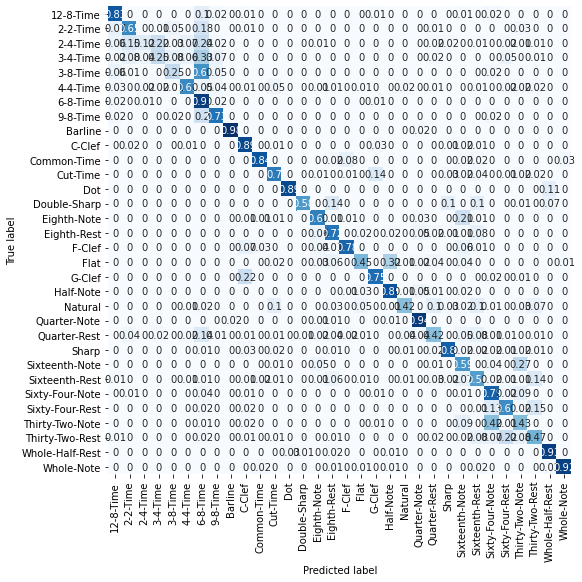

In [ ]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = nomedasclasses, 
                     columns = nomedasclasses)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues,cbar=False)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

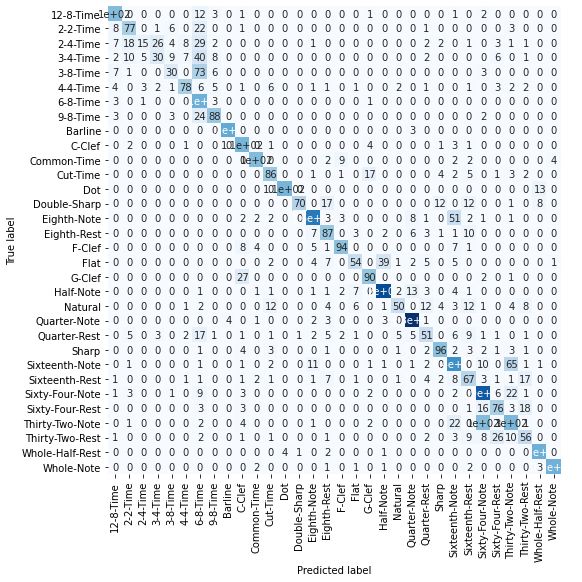

In [ ]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
# con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat,
                     index = nomedasclasses, 
                     columns = nomedasclasses)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues,cbar=False)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()